### Imports

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier


%matplotlib inline
pd.options.display.max_columns = None

### Importing Data

In [127]:
df = pd.read_csv("Data/bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Column Descriptions

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



### Checking for nulls

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Visualizations

**Age Distribution**

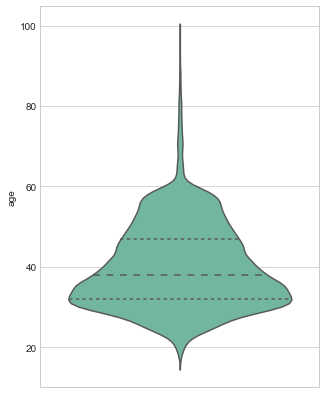

In [128]:
plt.figure(figsize=(5, 7))
sns.violinplot(y="age", palette="Set2", data=df, inner="quartile")

**Plotting distribution of output variable (whether the client subscribed)**

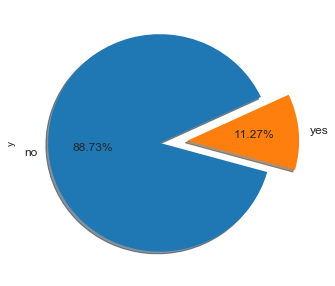

In [129]:
plt.figure(figsize=(5,5))
df.y.value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, fontsize=12, startangle=25)

**Plotting various jobs and their distributions**

Employment Counts


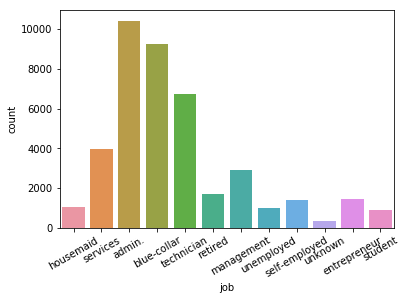

In [9]:
p = sns.countplot(x='job', data=df)
p.set_xticklabels(p.get_xticklabels(), rotation = 30)
print("Employment Counts")

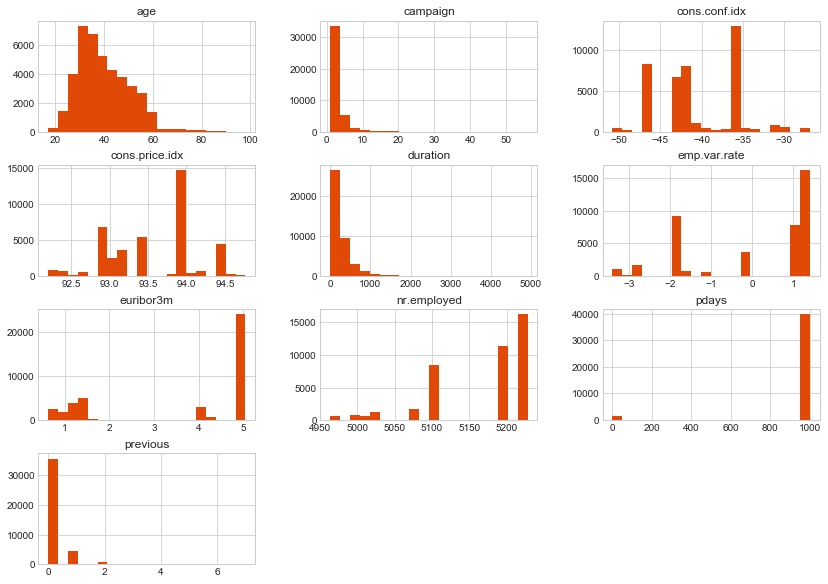

In [10]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Plot of duration distribution**

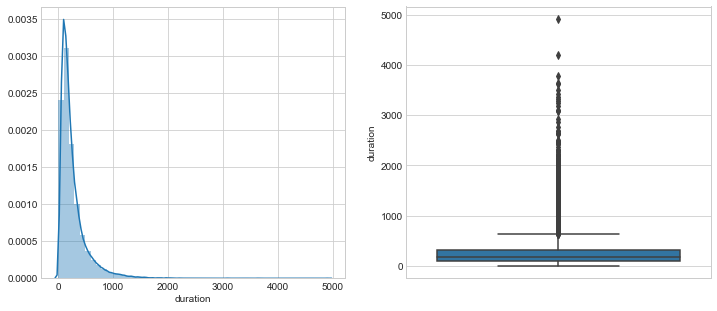

In [135]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.distplot(df.duration, ax=ax1)
sns.boxplot(x = 'duration', data = df, orient = 'v', ax = ax2)

**Plotting Time variables and their distributions**

In [136]:
print(df.day_of_week.unique())
print(df.month.unique())
print(len(df.month.unique()))
# Not in Jan and Feb

['mon' 'tue' 'wed' 'thu' 'fri']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
10


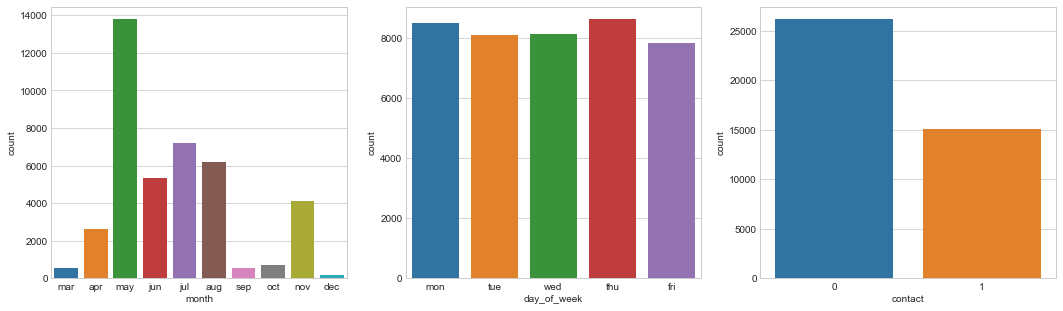

In [137]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
sns.countplot("month", data=df, ax=ax1, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
sns.countplot("day_of_week", data=df, ax=ax2, order=['mon', 'tue', 'wed', 'thu', 'fri'])
sns.countplot("contact", data = df, ax=ax3)
# 0: cellular, 1: telephone

**Distribution of various categorical variables**

Count plots


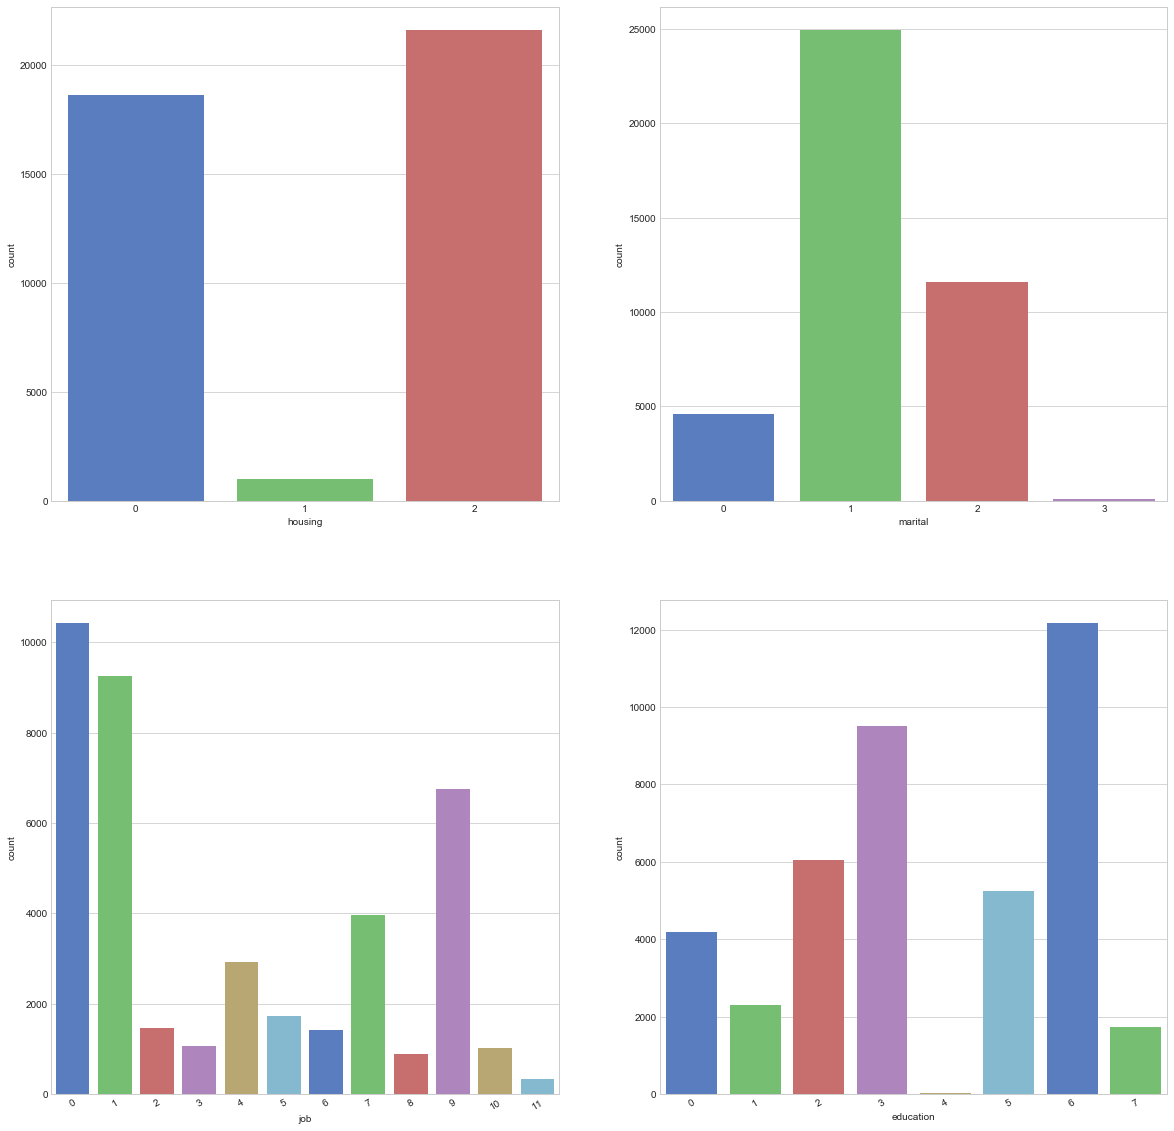

In [138]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
                      
g1 = sns.countplot("housing", data=df, palette="muted", ax=ax1)
g2 = sns.countplot("marital", data=df, palette="muted", ax=ax2)
g3 = sns.countplot("job", data=df, palette="muted", ax=ax3)
g3.set_xticklabels(g3.get_xticklabels(), rotation = 30)
g4 = sns.countplot("education", data=df, palette="muted", ax=ax4)
g4.set_xticklabels(g4.get_xticklabels(), rotation = 30)
print("Count plots")

### Making Label Encoders to convert some categorical strings to numeric values

In [139]:
marital_le = LabelEncoder()
df.marital = marital_le.fit_transform(df.marital)

job_le = LabelEncoder()
df.job = job_le.fit_transform(df.job)

education_le = LabelEncoder()
df.education = education_le.fit_transform(df.education)

housing_le = LabelEncoder()
df.housing = housing_le.fit_transform(df.housing)

contact_le = LabelEncoder()
df.contact = contact_le.fit_transform(df.contact)

default_le = LabelEncoder()
df.default = default_le.fit_transform(df.default)

loan_le = LabelEncoder()
df.loan = loan_le.fit_transform(df.loan)

month_le = LabelEncoder()
df.month = month_le.fit_transform(df.month)

day_le = LabelEncoder()
df.day_of_week = day_le.fit_transform(df.day_of_week)

In [140]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Converting Duration values to categorical values

In [141]:
print('1st Quartile: ', df['duration'].quantile(q = 0.25))
print('2nd Quartile: ', df['duration'].quantile(q = 0.50))
print('3rd Quartile: ', df['duration'].quantile(q = 0.75))
print('4th Quartile: ', df['duration'].quantile(q = 1.00))
#Calculate the outliers:
# Interquartile range, IQR = Q3 - Q1
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', df['duration'].quantile(q = 0.75) + 
                      1.5*(df['duration'].quantile(q = 0.75) - df['duration'].quantile(q = 0.25)), 'are outliers')

1st Quartile:  102.0
2nd Quartile:  180.0
3rd Quartile:  319.0
4th Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [142]:
df.loc[df.duration <= 102, 'duration'] = 1
df.loc[(df.duration > 102) & (df.duration<=180), 'duration'] = 2
df.loc[(df.duration > 180) & (df.duration<=319), 'duration'] = 3
df.loc[(df.duration > 319) & (df.duration<=644.5), 'duration'] = 4
df.loc[df.duration > 644.5, 'duration'] = 5

In [143]:
df.duration[:5]

0    3
1    2
2    3
3    2
4    3
Name: duration, dtype: int64

In [144]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,3,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,3,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,3,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Making a new dataframe of categorical variables

In [146]:
newdf = df.iloc[:, :11]
newdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
0,56,3,1,0,0,0,0,1,6,1,3
1,57,7,1,3,1,0,0,1,6,1,2
2,37,7,1,3,0,2,0,1,6,1,3
3,40,0,1,1,0,0,0,1,6,1,2
4,56,7,1,3,0,0,2,1,6,1,3


### Making a list of output variable ('y')

In [147]:
opdf = df.iloc[:, -1]

In [27]:
y = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(newdf, y, test_size = 0.2, random_state = 42)
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
12556,40,1,1,2,1,2,0,1,3,1,1
35451,31,0,1,6,0,0,0,0,6,1,2
30592,59,5,1,0,0,0,0,0,6,1,1
17914,43,3,0,2,0,2,0,0,3,3,1
3315,39,0,2,3,1,0,0,1,6,2,4


In [108]:
y_train.head()

,['y']_yes
12556,0
35451,0
30592,0
17914,0
3315,0


In [112]:
array(X_test.head(1))

array([[57,  9,  1,  3,  0,  0,  2,  0,  6,  1,  4]], dtype=int64)

In [100]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [119]:
tester = [[57,  9,  1,  3,  0,  0,  2,  0,  6,  1,  4]]
sc_X.transform(tester)

array([[ 1.62735672,  1.47032851, -0.28403994, -0.35040483, -0.51263149,
        -1.08842373,  2.30871218, -0.75777309,  0.76289292, -0.71941502,
         1.15923902]])

In [102]:
X_test

array([[ 1.62735672,  1.47032851, -0.28403994, ...,  0.76289292,
        -0.71941502,  1.15923902],
       [ 1.4357066 ,  2.02730635, -0.28403994, ...,  0.76289292,
        -0.00408142,  0.35085559],
       [-0.67244473, -0.75758283, -0.28403994, ...,  0.76289292,
        -1.43474862, -1.26591129],
       ...,
       [ 0.57328106, -0.47909391,  1.35159724, ..., -1.82587025,
        -0.71941502, -0.45752785],
       [-0.86409485, -1.03607174,  1.35159724, ..., -0.53148866,
         1.42658578,  1.96762246],
       [ 1.81900684, -1.03607174, -0.28403994, ...,  0.76289292,
        -1.43474862,  0.35085559]])

In [91]:
X_train[0]

array([-1.66930454e-03, -7.57582826e-01, -2.84039938e-01, -8.18131749e-01,
        1.94856733e+00,  9.42068095e-01, -4.53476827e-01,  1.31965626e+00,
       -5.31488662e-01, -7.19415018e-01, -1.26591129e+00])

In [90]:
X_test[0]

array([ 1.62735672,  1.47032851, -0.28403994, -0.35040483, -0.51263149,
       -1.08842373,  2.30871218, -0.75777309,  0.76289292, -0.71941502,
        1.15923902])

In [31]:
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)

[[7187  116]
 [ 734  201]]
90.0


In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,3,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,3,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,3,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [42]:
print(list(logpred).count(0))
print(list(logpred).count(1))

7921
317


In [43]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)

C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[7083  220]
 [ 586  349]]
90.0


In [47]:
print(list(gbkpred).count(0))
print(list(gbkpred).count(1))

7669
569


In [122]:
gbk.predict(tester)

array([1], dtype=uint8)

In [124]:
class_probabilities = gbk.predict_proba(tester)
class_probabilities

array([[0.22474579, 0.77525421]])

In [120]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_train)

In [121]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

,0,1,2,3,4
0,0.049094,-2.858866,-0.863316,1.754844,-1.202572
1,-9.069080,-3.518507,0.620547,-2.856419,-1.093156
2,19.061324,0.796617,2.833158,2.561531,-1.283972
3,3.055772,-0.862858,-0.692235,1.892681,0.800642
4,-1.015049,-3.877921,1.656650,-0.208700,0.103248


In [69]:
fulldf = newdf.join(y)

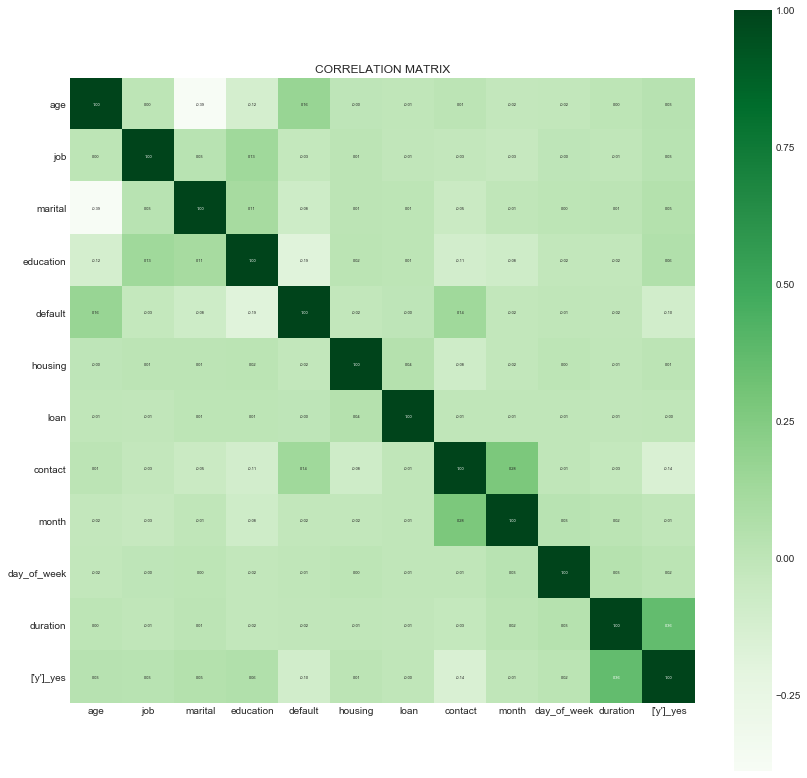

In [70]:
corr = fulldf.corr()
# Finding correlation of remaining columns
corr.shape

plt.figure(figsize=(14,14))
plt.title("CORRELATION MATRIX")
sns.heatmap(corr, cbar=True, square= True, fmt='.2f',annot=True,annot_kws={'size':4}, cmap='Greens')